In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../src")
from utils import *
from dgps import *
from hierarchical_clustering_invariant import *

# Example notebook
This is a notebook illustrating the project, showing the usage of data generating function, algorithm fitting, inference and simulation visualization.

## 1. Data generation
`dgps.py` supports generating data under the null (no clustering structure) and alternative hypothesis (3 true clusters as example).

In [2]:
n=30
p=2
sigma=1.0
mu=np.zeros(p)
rng = np.random.default_rng(0)

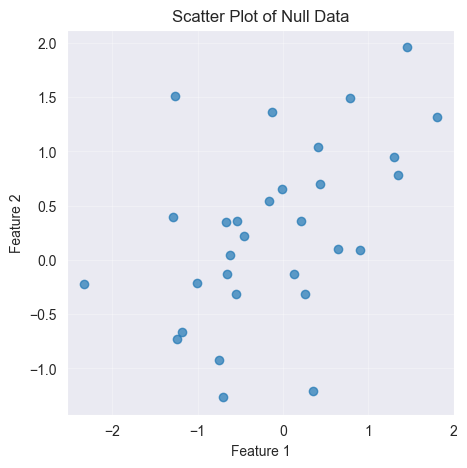

In [3]:
X_null = generate_null_data(n,p,mu,sigma,rng)
plt.figure(figsize=(5,5))
plt.scatter(X_null[:,0], X_null[:,1], alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Null Data")
plt.grid(True, alpha=0.3)
plt.show()

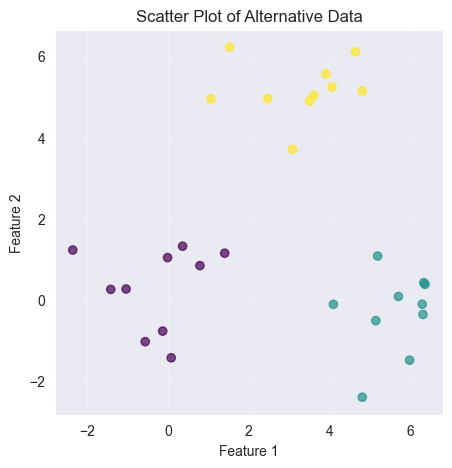

In [6]:
n_each=10
delta = 6 #parameter controlling the cluster separation
X_alt,labels = generate_alternative_data(n_each, delta, sigma, n_clusters=3, true_mean=False, rng=rng)
plt.figure(figsize=(5,5))
plt.scatter(X_alt[:,0], X_alt[:,1], c=labels,cmap='viridis', alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Alternative Data")
plt.grid(True, alpha=0.3)
plt.show()

## 2. Model fitting
Using `AgglomerativeClustering` in `hierarchical_clustering_invariant.py` to fit randomized hierarchcal clustering and do further inference.

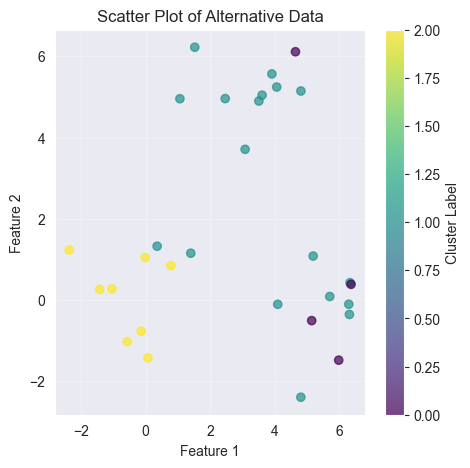

In [16]:
model = AgglomerativeClustering(X_alt, n_clusters=3, tau=0.5, affinity='euclidean', linkage='average', random_state=1)
model.fit()
cluster_labels = np.zeros(X_alt.shape[0], dtype=int)
for idx, node in enumerate(model.K_clusters):
    for point_index in node.points:
        cluster_labels[point_index] = idx

plt.figure(figsize=(5,5))
plt.scatter(X_alt[:,0], X_alt[:,1], c=cluster_labels, cmap="viridis", alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Alternative Data")
plt.grid(True, alpha=0.3)
plt.show()


## 3. Compute p-value
One can use `model.merge_inference_F_grid` to compute the p-value. This function include the coarse grid approximation and self-adaptive grid width adjustment mentioned in the report.

In [18]:
#first need to find the node that we want to test
winning_nodes = list(model.existing_clusters_log.keys())
key = winning_nodes[-1] #the last winning pair
node = key[0].parent

pval,_,_ = model.merge_inference_F_grid(node, grid_width =180, ncoarse=20, ngrid=2000)
print(pval)

1e-05 62.887157905814746
0.7768678876156402


## 4. p-value validity verification
Use the function `check_p_value_uniformity` in `utils.py`, we can plot the ecdf and qq plot of the computed p-value and verify whether the p-values are uniformly distributed as expected.

The function `check_p_value_uniformity_multi_tau_parallel` supports computing p-values using multiple randomization level $\tau$ in parallel.

1e-05 48.57198297627814
1e-05 180.0
1e-05 54.04683591094004
1e-05 76.57868141808243
1e-05 111.79093299956713
1e-05 11.678164040887864
1e-05 94.10369961216509
1e-05 110.17702904843887
1e-05 63.1720278404419
1e-05 64.75191190779634
1e-05 87.9672439714675
1e-05 63.72575689892278
1e-05 105.21123764898363
1e-05 73.0546188574013
1e-05 78.27837213764053
1e-05 83.16735659884657
1e-05 131.49546444226118
1e-05 87.54492268963028
1e-05 85.8484205643847
1e-05 60.18248784313342
1e-05 59.13379798792225
1e-05 96.96025848316428
1e-05 138.12743121131064
1e-05 54.79851148385236
1e-05 52.69448762974811
1e-05 66.93350385056013
1e-05 66.04626831383767
1e-05 55.85752155389154
1e-05 180.0
1e-05 92.63871357102778
1e-05 65.64691586337402
1e-05 50.384559915686225
1e-05 57.00392758194239
1e-05 69.40518246249928
1e-05 57.19600223078666
1e-05 63.878115097526155
1e-05 61.17934465478017
1e-05 117.15367242271738
1e-05 56.67996942485037
1e-05 67.84432395180642
1e-05 54.49813657994365
1e-05 55.81564288026303
1e-05 74.87

/Users/judydw/Documents/GitHub/stats607_finalproj/src/utils.py:65: RuntimeWarning: invalid value encountered in scalar divide
  observed_target = (m - 2) * np.linalg.norm(P0 @ X, 'fro') ** 2 / np.linalg.norm(P1 @ X, 'fro') ** 2


1e-05 69.4027934674979
1e-05 130.33491587001788
1e-05 77.97289350209843
1e-05 80.80629676505241
1e-05 47.96784632909127
1e-05 76.94200648409203
1e-05 180.0
1e-05 98.15885855652715
1e-05 46.07488909411293
1e-05 74.33512546188248
1e-05 104.17988007475651
1e-05 87.26872652387438
1e-05 60.62803241090384
1e-05 118.05909048602416
1e-05 64.47741778305817
1e-05 68.19561820364136
1e-05 106.36107962334503
1e-05 51.09148580564228
1e-05 99.10154029365684
1e-05 98.00038128468789
1e-05 50.15074958696499
1e-05 73.26581772488753
1e-05 118.28902171549717
1e-05 44.15792242252633
1e-05 43.83357431063813
1e-05 88.79148316575781
1e-05 79.40160322260024
1e-05 91.84175401683035
1e-05 113.20389273095692
1e-05 46.270525299683584
1e-05 86.32387121481418
1e-05 51.79596823550893
1e-05 56.999806937262235
1e-05 69.85797878551026
1e-05 77.37687105172402
1e-05 97.6879739464763
1e-05 86.47725381199024
1e-05 72.60191242477444
1e-05 136.17969176001495
1e-05 71.61931215803087
1e-05 71.58229224343557
1e-05 63.901145907405

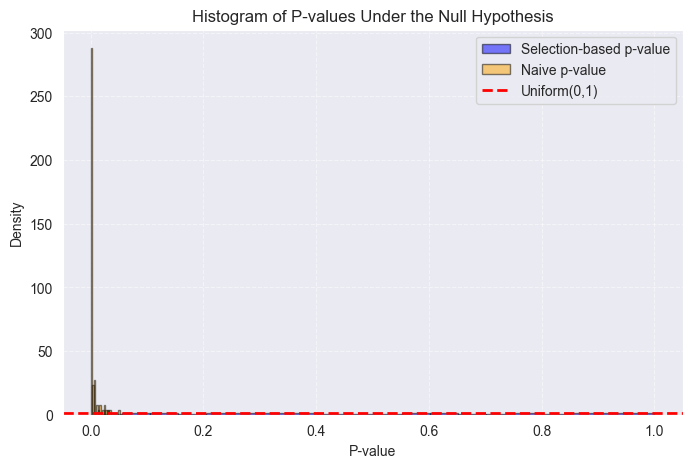

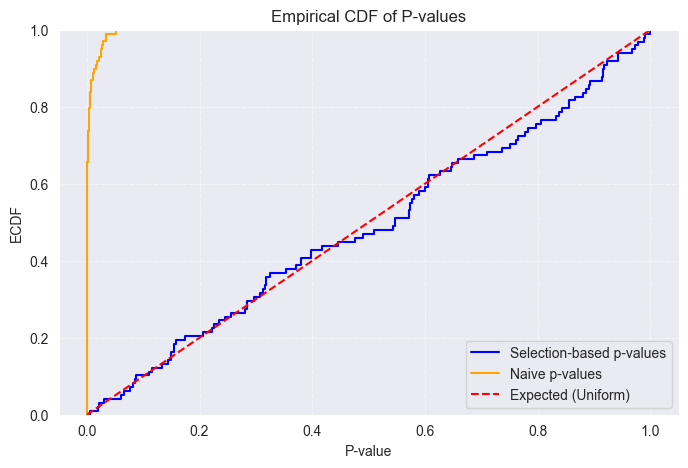

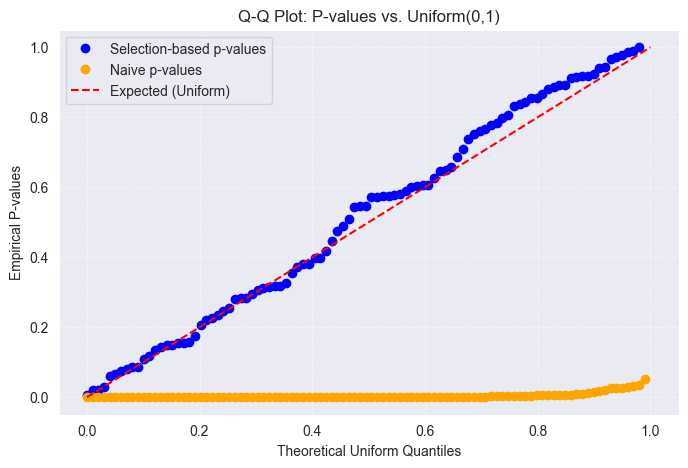

In [22]:
check_p_value_uniformity(n=30, p=2, sigma=1, K=3 ,tau=0.1, linkage="complete", num_trials=100)